In [ ]:
# carrega imagens da web
!wget -O 'biel.png' 'https://github.com/brunaeloisa/brunaeloisa.github.io/blob/main/imagens/biel.png?raw=true'
!wget -O 'lago.png' 'https://github.com/brunaeloisa/brunaeloisa.github.io/blob/main/imagens/lago.png?raw=true'

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# rode esta célula para carregar uma imagem do seu computador
from google.colab import files
uploaded = files.upload()

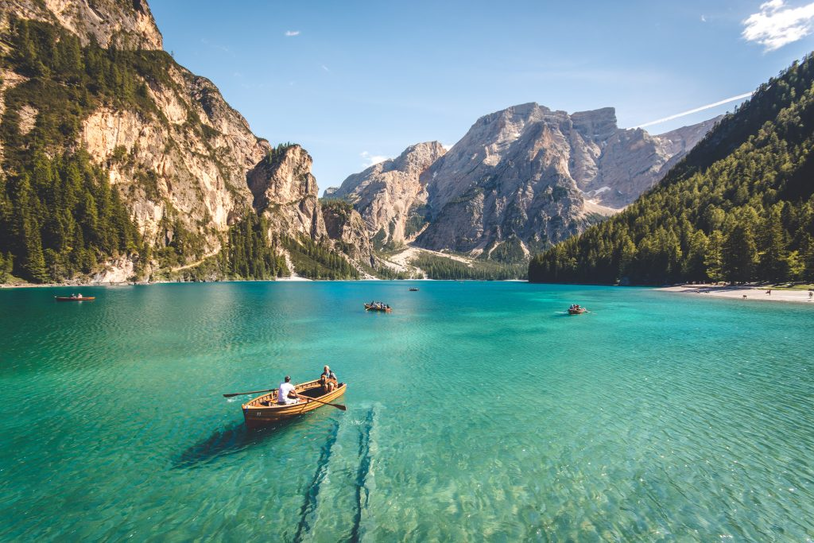

In [ ]:
arquivo = 'lago.png' # substitua pelo nome do arquivo desejado
img_orig = cv2.imread(arquivo, cv2.IMREAD_COLOR)
cv2_imshow(img_orig)

altura, largura, canais = img_orig.shape

In [ ]:
# garante que a imagem possua dimensões pares
if altura % 2 != 0:
  altura -= 1
  img_orig = img_orig[:-1,::]
if largura % 2 != 0:
  largura -= 1
  img_orig = img_orig[::,:-1]

In [ ]:
meia_altura = int(altura/2)
meia_largura = int(largura/2)

# cria array para armazenar a nova imagem
img_trocada = np.zeros((altura, largura, canais), dtype=np.uint8)

In [ ]:
# quarto quadrante = segundo quadrante
img_trocada[meia_altura:,meia_largura:] = img_orig[:meia_altura,:meia_largura]
# terceiro quadrante = primeiro quadrante
img_trocada[meia_altura:,:meia_largura] = img_orig[:meia_altura,meia_largura:]
# primeiro quadrante = terceiro quadrante
img_trocada[:meia_altura,meia_largura:] = img_orig[meia_altura:,:meia_largura]
# segundo quadrante = quarto quadrante
img_trocada[:meia_altura,:meia_largura] = img_orig[meia_altura:,meia_largura:]

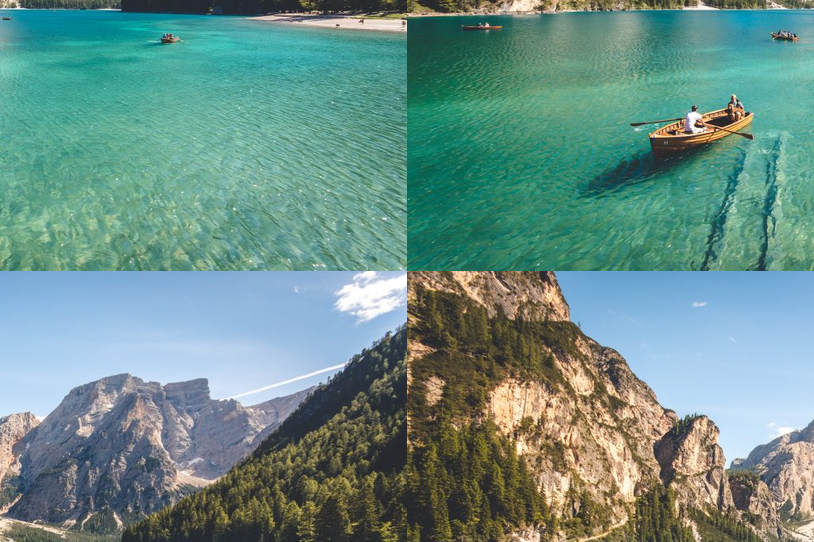

In [ ]:
cv2_imshow(img_trocada)

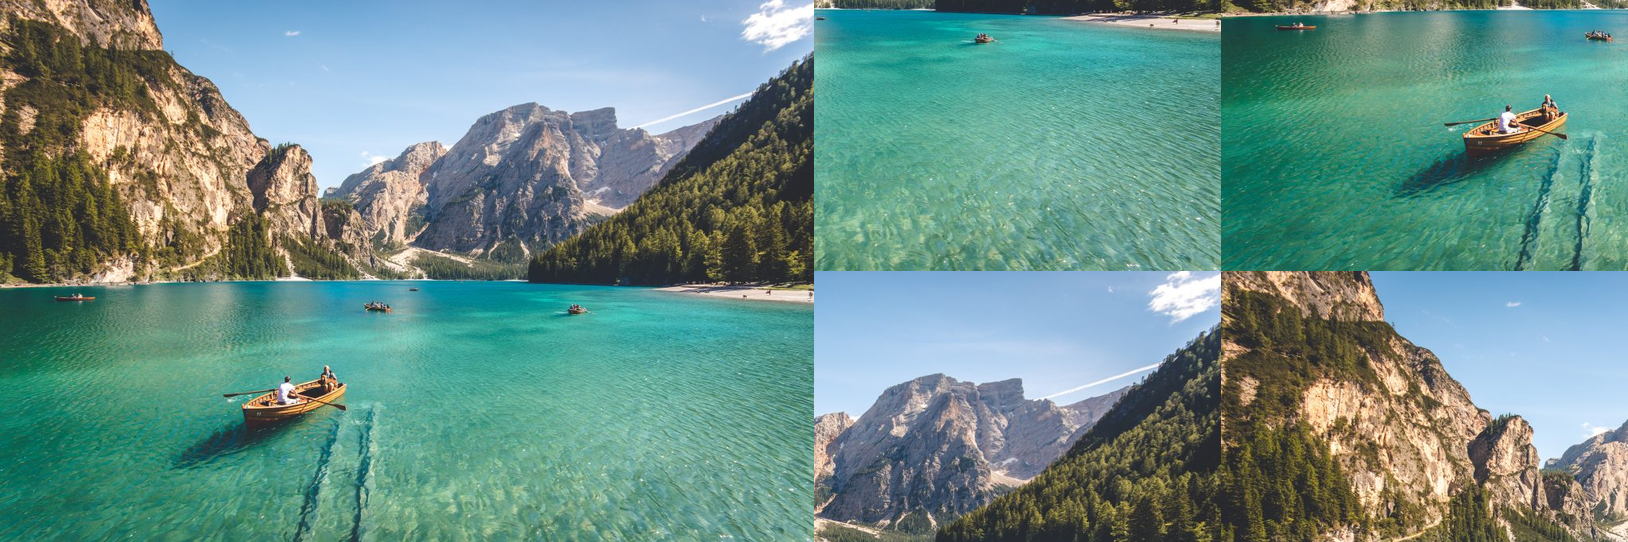

In [ ]:
antes_e_depois = cv2.hconcat([img_orig, img_trocada])
cv2_imshow(antes_e_depois)